In [1]:
import pyreadstat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import os

from Mymodule.ModelHandler import *
from Mymodule.Utils import *
from Mymodule.GradCam import *
from Mymodule.BatchHandler import *

from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix
import shutil

## Data format checking

In [2]:
# sav 파일 경로 지정
#file_path = './Data/231107_PSG.xlsx'
file_path = './Data/231203_PSG.xlsx'

# sav 파일 읽기
df = pd.read_excel(file_path)
df['sex'] = df['sex'].map({'F': 0, 'M': 1})

# PRE 변수 제외
columns = df.columns
print('The number of features : ', len(columns))
print(columns)
df.head()

The number of features :  28
Index(['NO', 'OSA', 'sex', 'Age (avg.)', 'Narrowing of airway ', 'VAS ',
       'Symptom duration (days) ', 'Bruxism', 'Headache', 'Stress', 'Tinnitus',
       'Macrotrauma hx.', 'Height\n(cm)', 'Weight\n(cm)', 'BMI\n', 'REI',
       'OAI', 'CAI', '최저탈포화', 'O-C', 'I-S', 'DEP', 'ANX', 'HOS', 'PHOB', 'PAR',
       'PSY', 'MRI narrowing '],
      dtype='object')


,NO,OSA,sex,Age (avg.),Narrowing of airway,VAS,Symptom duration (days),Bruxism,Headache,Stress,...,최저탈포화,O-C,I-S,DEP,ANX,HOS,PHOB,PAR,PSY,MRI narrowing
0,1,1,0,51,1,8.0,270,1,1,0,...,81,72,79,67,73,72,78,75,71,1.0
1,2,0,1,47,0,4.0,3650,0,0,1,...,82,64,68,64,70,69,84,67,72,1.0
2,3,0,1,34,0,5.0,30,0,1,1,...,89,32,34,34,38,38,40,38,38,NaN
3,4,0,0,27,0,8.0,21,0,1,1,...,91,32,34,33,35,38,40,38,38,NaN
4,5,0,1,58,0,3.0,120,0,1,1,...,87,34,34,34,35,38,40,38,38,1.0


In [3]:
df.describe()

,NO,OSA,sex,Age (avg.),Narrowing of airway,VAS,Symptom duration (days),Bruxism,Headache,Stress,...,최저탈포화,O-C,I-S,DEP,ANX,HOS,PHOB,PAR,PSY,MRI narrowing
count,55.00000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,16.000000
mean,28.00000,0.527273,0.327273,45.872727,0.454545,5.654545,627.109091,0.345455,0.527273,0.509091,...,86.490909,47.254545,48.000000,48.218182,49.418182,47.545455,46.581818,45.181818,47.072727,0.812500
std,16.02082,0.503857,0.473542,18.598143,0.502519,2.090261,1234.378651,0.479899,0.503857,0.504525,...,4.962350,9.365457,10.624918,10.190211,10.111766,8.653448,13.013797,7.013455,7.997348,0.403113
min,1.00000,0.000000,0.000000,17.000000,0.000000,1.500000,1.000000,0.000000,0.000000,0.000000,...,77.000000,31.000000,34.000000,33.000000,35.000000,38.000000,1.000000,38.000000,38.000000,0.000000
25%,14.50000,0.000000,0.000000,26.000000,0.000000,4.000000,21.000000,0.000000,0.000000,0.000000,...,83.000000,41.000000,38.000000,40.000000,43.000000,40.000000,42.000000,40.000000,43.000000,1.000000
50%,28.00000,1.000000,0.000000,49.000000,0.000000,5.000000,180.000000,0.000000,1.000000,1.000000,...,88.000000,46.000000,48.000000,45.000000,48.000000,45.000000,43.000000,45.000000,45.000000,1.000000
75%,41.50000,1.000000,1.000000,59.500000,1.000000,7.000000,500.000000,1.000000,1.000000,1.000000,...,89.000000,53.000000,53.000000,55.500000,53.000000,52.000000,48.000000,48.000000,50.000000,1.000000
max,55.00000,1.000000,1.000000,76.000000,1.000000,10.000000,7300.000000,1.000000,1.000000,1.000000,...,96.000000,72.000000,79.000000,73.000000,73.000000,72.000000,99.000000,75.000000,72.000000,1.000000


## Data preprocessing

## Saving data

In [5]:
data = df.values[:,1:]
print(f'data.shape : {data.shape}')
np.save('./Data/231110_data.npy', data)

data.shape : (55, 27)


## Visualizing Data ratios

/tmp/ipykernel_2268111/2044566833.py:19: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  plt.savefig('./Figures/feature_analyzing')
/tmp/ipykernel_2268111/2044566833.py:19: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  plt.savefig('./Figures/feature_analyzing')
/tmp/ipykernel_2268111/2044566833.py:19: UserWarning: Glyph 53448 (\N{HANGUL SYLLABLE TAL}) missing from current font.
  plt.savefig('./Figures/feature_analyzing')
/tmp/ipykernel_2268111/2044566833.py:19: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  plt.savefig('./Figures/feature_analyzing')
/tmp/ipykernel_2268111/2044566833.py:19: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  plt.savefig('./Figures/feature_analyzing')


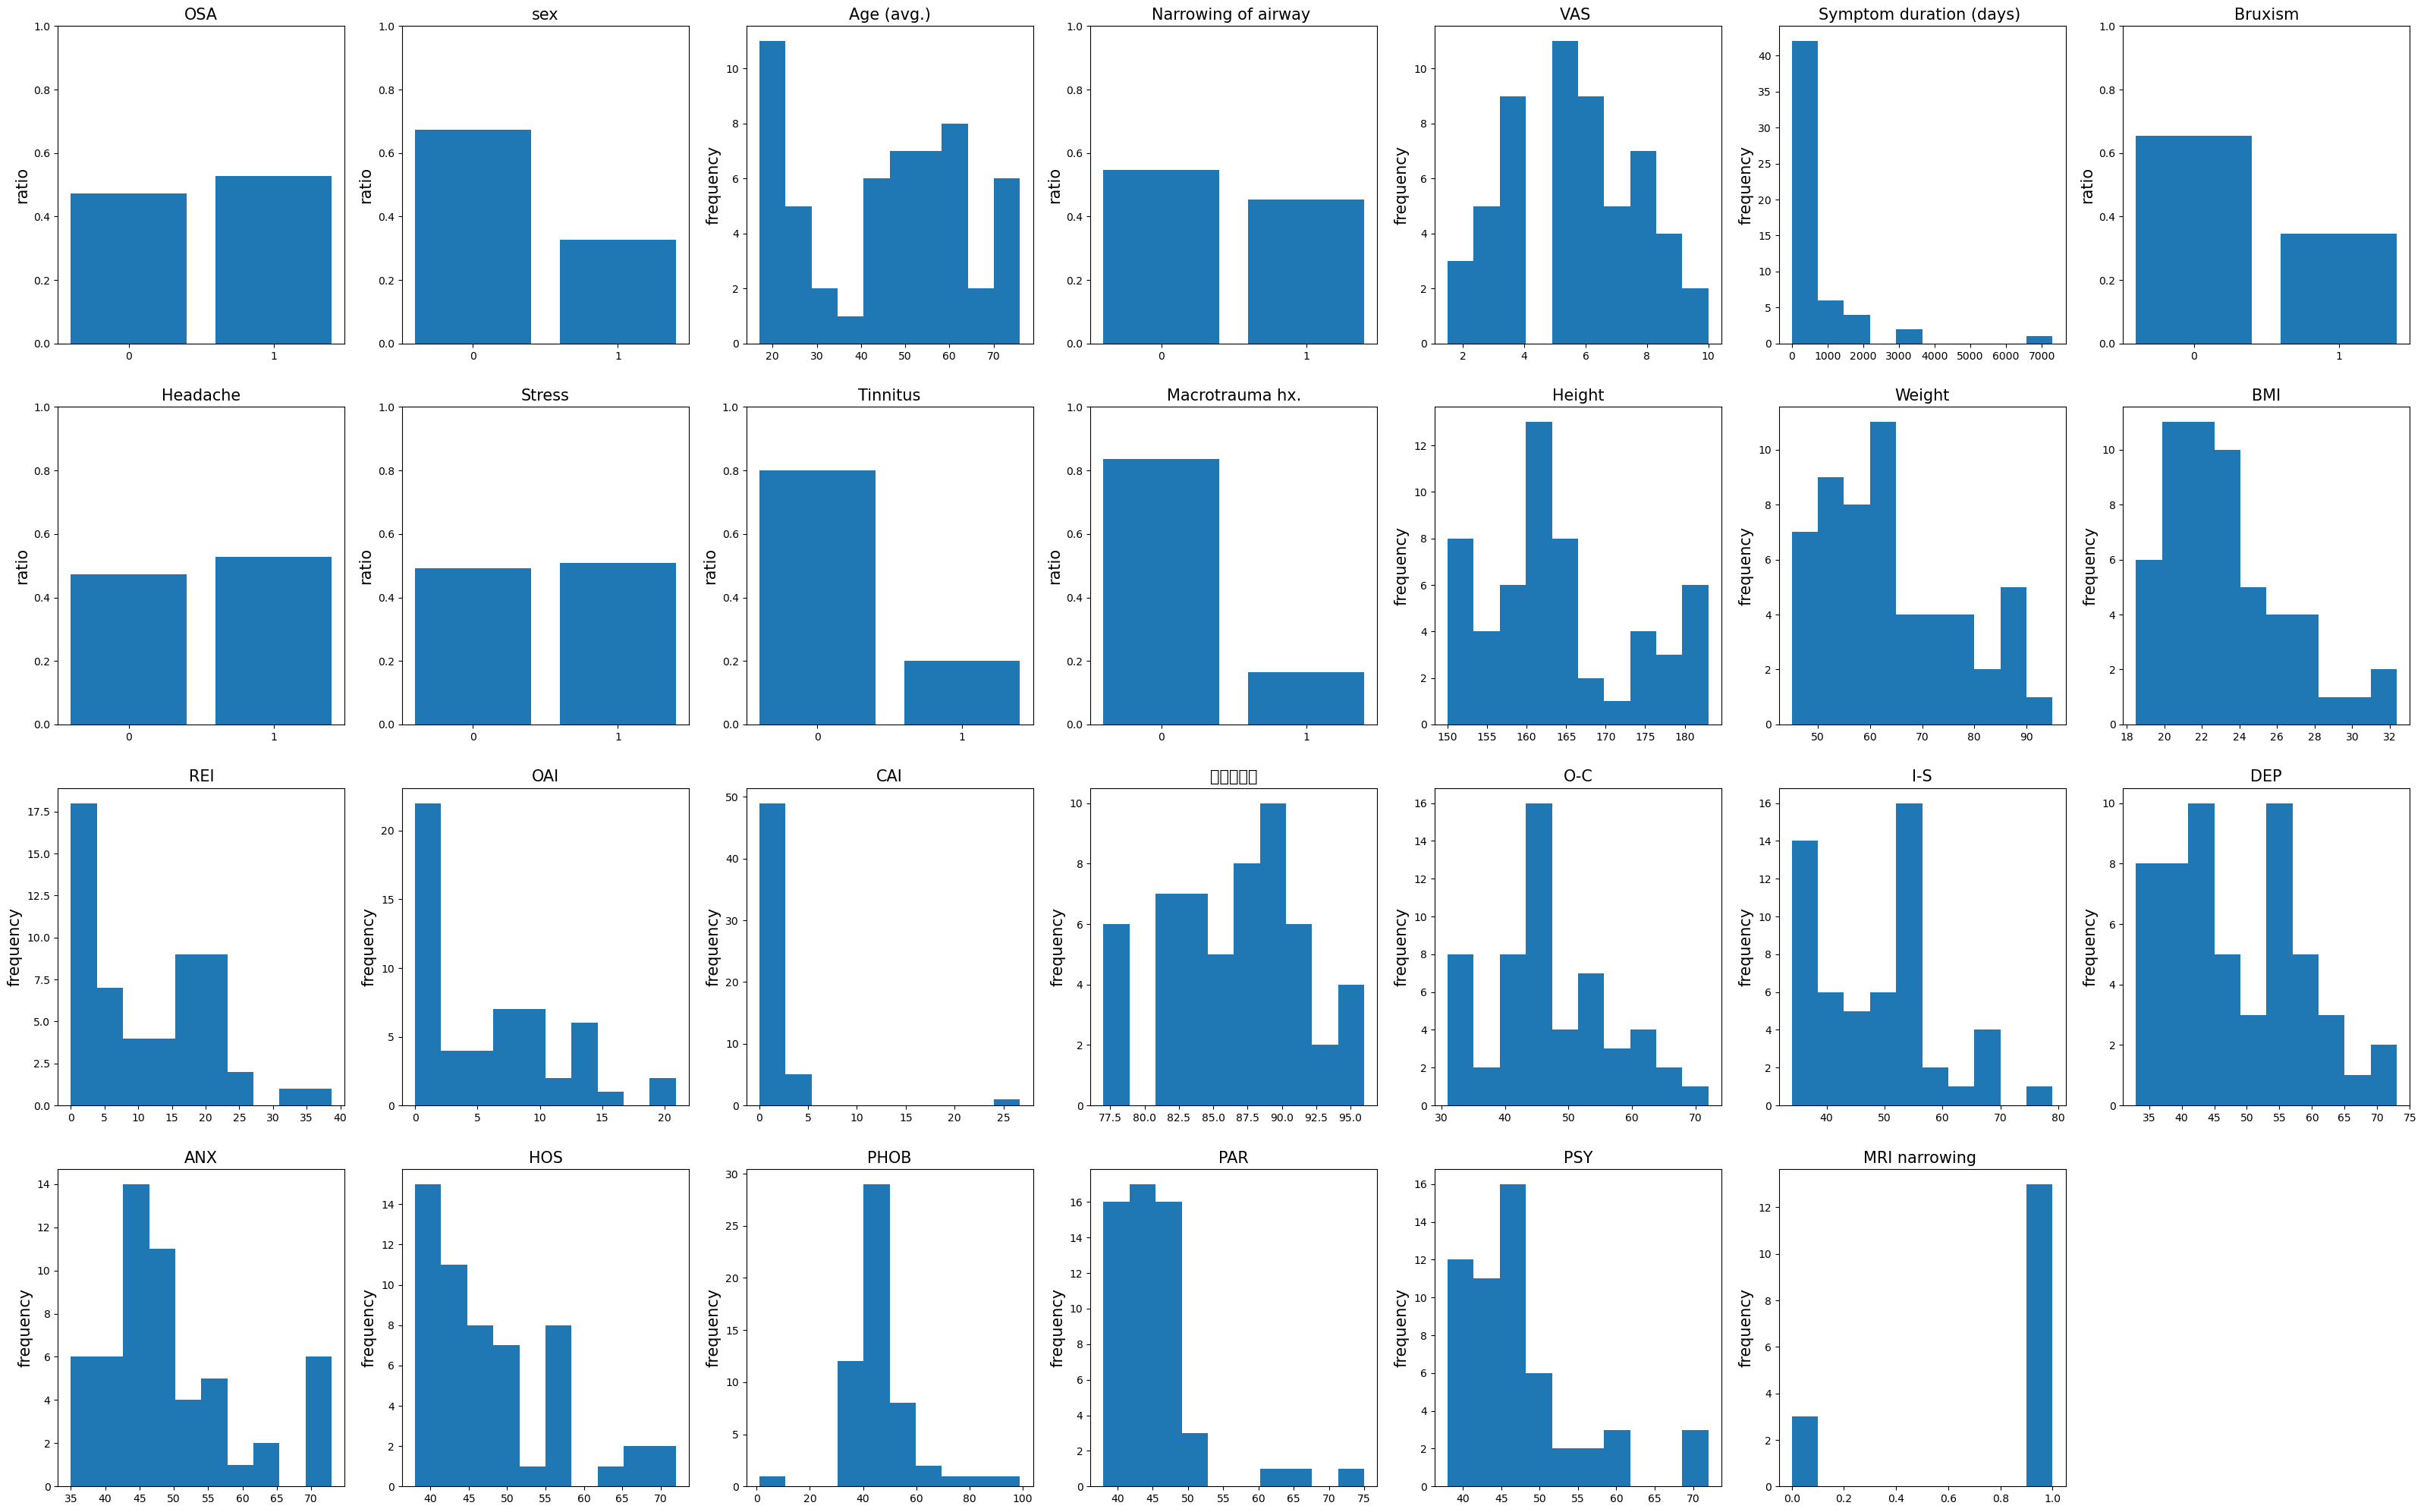

In [9]:
plt.figure(figsize = (40,25))

for i, column in enumerate(columns[1:]):
    plt.subplot(4,7,i+1)
    plt.title(column.split('\n')[0], size = 15)
    
    if len(set(data[:,i])) <= 2:
        
        plt.bar(list(set(data[:,i])), [ (data[:,i] == 0).sum()/55, (data[:,i] == 1).sum()/55 ] )
        plt.xticks([0,1])
        plt.ylim(0,1)
        plt.ylabel('ratio',size = 15)
        

    elif len(set(data[:,i])) > 2:
        plt.hist(data[:,i])
        plt.ylabel('frequency',size = 15)

plt.savefig('./Figures/feature_analyzing')
plt.show()